In [49]:
# import random
# import math
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
# from time import sleep
import ipywidgets as widgets
from ipywidgets import interactive
import pickle
%matplotlib inline

from world import World
from managers import Manager_simple, Breeder

from agent_simple_random import Agent_simple_random 
from agent_hamilton_cycle import Agent_hamilton_cycle
from genetic import Agent_genetic_3
# import genetic_instinct

# Basic usage of the framework

## Creating a World
World is an object which holds the current and past states of the environment and it updates the environment according to the rules. Let's create one:

In [2]:
w = World()
w

                |
                |
          ◯◯    |
                |
        ██      |
        ░░      |
                |
                | score=0 steps=0 

The black square represents the head of the snake, the dotted one is its body and the two circles denote the apple.

## Play a game in the world
We will use `Agent_simple_random` to illustrate the basics.
`Agent_simple_random` always goes in the direction of an apple if it sees one. If it doesn't see the apple, it chooses a random direction from those where there isn't an obstacle in a distance of 1.

In [3]:
agent = Agent_simple_random()
w.game(agent)
w

                |
          ◯◯    |
                |
                |
                |
    ░░░░░░░░░░░░|
          ░░░░░░|
          ░░░░░░| score=10 steps=115  Game Over

We can now replay the game to see how the agent played. You can move through the game by dragging or arrow keys:

In [4]:
w.replay()

interactive(children=(IntSlider(value=57, description='step', max=115), Output(layout=Layout(height='450px')))…

## Use a manager to play multiple games
Manager is an object which can run multiple games or train the agents. It can also show the results. We will illustrate its use with `Manager_simple`. 

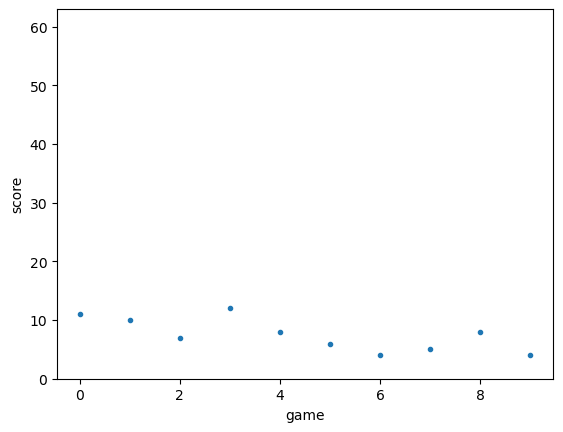

In [5]:
manager = Manager_simple(Agent_simple_random)

manager.play_games(10)
manager.plot()

## Using Breeder to manage genetic agents
`Breeder` can breed genetic agents. We can try for instance 20 agents, 20 games per each and 60 generations. It may take a minute or two.

In [26]:
br = Breeder(Agent_genetic_3, n_agents=100)
br.games_per_agent = 15
br.breed(60)

Now we can view the average scores and steps.

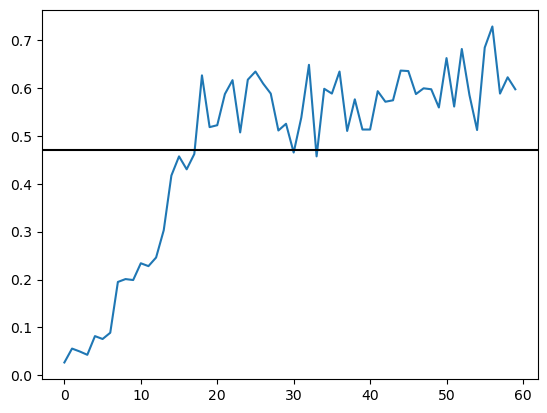

In [27]:
br.plot()

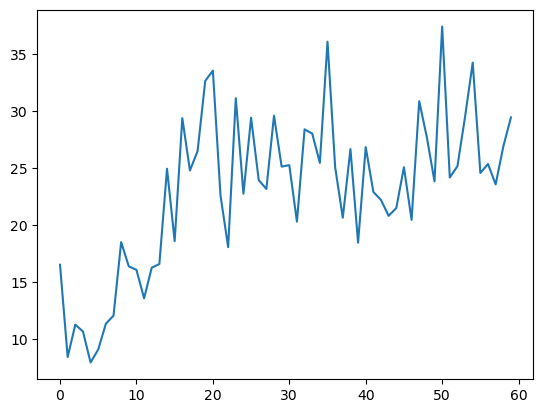

In [28]:
plt.plot(br.generation_steps)

If we are interested to know the strategy of the snakes in the last generation, we can extract the agent and simulete some game with him.

In [29]:
a = br.agents[3]
w = World()
w.game(a)
w.replay()

interactive(children=(IntSlider(value=13, description='step', max=27), Output(layout=Layout(height='450px'))),…

If we really like the agents and we don't want to loose them, we can save them like this.

In [30]:
a = br.agents
pickle.dump(a, open("agents_genetic_gen_60", "wb"))

Then we can just load it and do whatever we want next.

In [32]:
b = pickle.load(open("agents_genetic_gen_60", "rb"))

If we want our snakes from the last generation to continue breeding for few more generations, it is very easy:

In [38]:
br.breed(60)

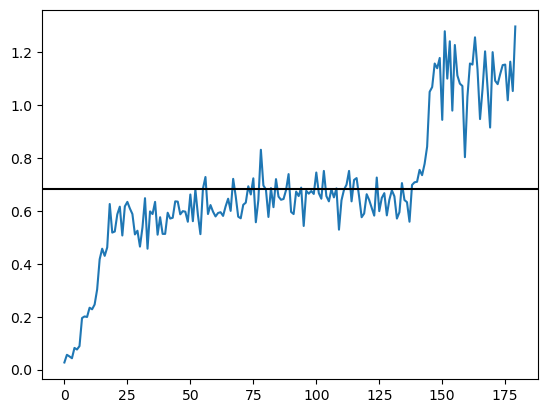

In [39]:
br.plot()

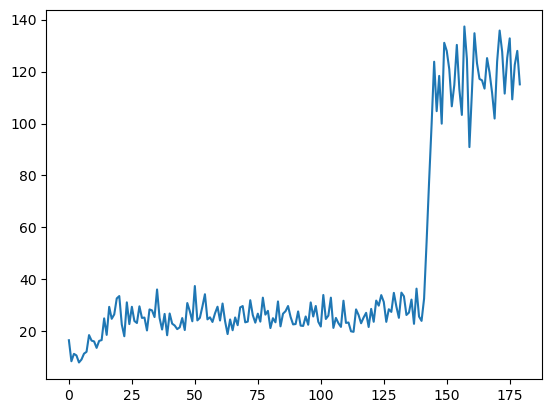

In [40]:
plt.plot(br.generation_steps)

In [44]:
a = br.agents[3]
w = World()
w.game(a)
w.replay()

interactive(children=(IntSlider(value=57, description='step', max=115), Output(layout=Layout(height='450px')))…

## Hamilton Agent

There is also an agent with a winning strategy in the sense that he always wins. This agent follows a fixed path which is a Hamiltonian path - i.e. it passes each vertex exactly once and ends up where it started. Thus the snake will do at most s^2 iterations (it wants to collect s^2 apples), where s is the length of the edge of the array, and it will pass at most s^2 patches in each iteration. The average number of steps to win is s^4/8.

In [50]:
w = World()
agent = Agent_hamilton_cycle()
w.game(agent)
w.replay()

interactive(children=(IntSlider(value=250, description='step', max=500), Output(layout=Layout(height='450px'))…

(It would have filled the whole place if its moves weren't restricted.)